In [ ]:
from transformers import pipeline
import bert_score
import io
import json
import csv
import pandas as pd
path = '/content/drive/MyDrive/MSK-LLM/Asclepius.csv'
with io.open(path, 'r', encoding='windows-1252') as csv_file:
  reader = csv.reader(csv_file)
  data = [row for row in reader]
df = pd.DataFrame(data[1:], columns=data[0])
print(df)


                       ANSWERID  \
0      0  ADAM_0003147_Sec1.txt   
1      1  ADAM_0003147_Sec2.txt   
2      2  ADAM_0002818_Sec7.txt   
3      3  ADAM_0002818_Sec9.txt   
4      4  GARD_0004375_Sec1.txt   
..   ...                    ...   
136  136  ADAM_0001283_Sec7.txt   
137  137  ADAM_0001284_Sec1.txt   
138  138  ADAM_0001284_Sec8.txt   
139  139  ADAM_0002089_Sec1.txt   
140  140  ADAM_0002320_Sec1.txt   

                                              Question  \
0    What is (are) Polycystic ovary syndrome ? (Als...   
1    What causes Polycystic ovary syndrome ? (Also ...   
2      What are the complications of Noonan syndrome ?   
3                     How to prevent Noonan syndrome ?   
4    What are the symptoms of Neurofibromatosis-Noo...   
..                                                 ...   
136  Do I need to see a doctor for Drug abuse first...   
137  What is (are) Drug allergies ? (Also called: A...   
138  What is (are) Drug allergies ? (Also called: A...   

In [ ]:
# Prepare a dictionary to store BERTScore metrics
scores = {
    "AnswerID": [],
    "Question": [],
    "Reference_Answer": [],
    "Model_Answer": [],
    "Precision": [],
    "Recall": [],
    "F1_Score": []
}

# Loop through each question-answer pair in the datasets
for _, row in df.iterrows():
    answer_id = row['ANSWERID']
    question = row['Question']
    reference_answer = row['Answer']

    # Retrieve the model-generated answer corresponding to the question
    model_answer_row = df[df['ANSWERID'] == answer_id]
    if model_answer_row.empty:
        print(f"No model answer found for AnswerID: {answer_id}")
        continue
    model_answer = model_answer_row.iloc[0]['AesclepiusAnswer']

    # Calculate BERTScore for the model answer against the reference answer
    P, R, F1 = bert_score.score([model_answer], [reference_answer], lang="en")

    # Store results
    scores["AnswerID"].append(answer_id)
    scores["Question"].append(question)
    scores["Reference_Answer"].append(reference_answer)
    scores["Model_Answer"].append(model_answer)
    scores["Precision"].append(P.item())
    scores["Recall"].append(R.item())
    scores["F1_Score"].append(F1.item())

# Convert the scores dictionary to a DataFrame and display/save results
results_df = pd.DataFrame(scores)
print(results_df.head())

# Optionally, save the results to a new CSV file
results_df.to_csv("/content/drive/MyDrive/Asclepius_BERTScore_Benchmark_Results.csv", index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

                AnswerID                                           Question  \
0  ADAM_0003147_Sec1.txt  What is (are) Polycystic ovary syndrome ? (Als...   
1  ADAM_0003147_Sec2.txt  What causes Polycystic ovary syndrome ? (Also ...   
2  ADAM_0002818_Sec7.txt    What are the complications of Noonan syndrome ?   
3  ADAM_0002818_Sec9.txt                   How to prevent Noonan syndrome ?   
4  GARD_0004375_Sec1.txt  What are the symptoms of Neurofibromatosis-Noo...   

                                    Reference_Answer  \
0  Polycystic ovary syndrome is a condition in wh...   
1  PCOS is linked to changes in hormone levels th...   
2  Buildup of fluid in tissues of body (lymphedem...   
3  Couples with a family history of Noonan syndro...   
4  The Human Phenotype Ontology provides the foll...   

                                        Model_Answer  Precision    Recall  \
0  Polycystic ovary syndrome is a condition chara...   0.851160  0.904592   
1  The exact cause of Polycystic o

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathl = '/content/drive/MyDrive/Llama3.1q_BERTScore_Benchmark_Results.csv'
pathA = '/content/drive/MyDrive/Asclepius_BERTScore_Benchmark_Results.csv'
pathi = '/content/drive/MyDrive/MSK-LLM/Llama3.1i_BERTScore_Benchmark_Results.csv'
import pandas as pd
df_l = pd.read_csv(pathl)
df_A = pd.read_csv(pathA)
df_i = pd.read_csv(pathi)
print(df_l.head())
print(df_A.head())
print(df_i.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                AnswerID                                           Question  \
0  ADAM_0003147_Sec1.txt  What is (are) Polycystic ovary syndrome ? (Als...   
1  ADAM_0003147_Sec2.txt  What causes Polycystic ovary syndrome ? (Also ...   
2  ADAM_0002818_Sec7.txt    What are the complications of Noonan syndrome ?   
3  ADAM_0002818_Sec9.txt                   How to prevent Noonan syndrome ?   
4  GARD_0004375_Sec1.txt  What are the symptoms of Neurofibromatosis-Noo...   

                                    Reference_Answer  \
0  Polycystic ovary syndrome is a condition in wh...   
1  PCOS is linked to changes in hormone levels th...   
2  Buildup of fluid in tissues of body (lymphedem...   
3  Couples with a family history of Noonan syndro...   
4  The Human Phenotype Ontology provides the foll...   

                                        Model_Answer  Preci

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSK-LLM/full.csv')
print(df.columns)

Index(['Unnamed: 0', 'AnswerID', 'CorrectedQuestions', 'Reference Answer',
       'URL', 'llama3.1 Answer', 'llama3.1 Hallucination Score',
       'llama3.1 Factor Score', 'Asclepius Answer',
       'Asclepius Hallucination Score', 'Asclepius Factor Score',
       'DeepEval_llama3.1_score', 'DeepEval_llama3.1_reason',
       'DeepEval_Asclepius_score', 'DeepEval_Asclepius_reason'],
      dtype='object')


In [ ]:
print(df['DeepEval_llama3.1_score'])

0       0.803526720453642
1      0.2757246355537899
2      0.3484835780925661
3       0.164302375492824
4      0.6123258712692239
              ...        
137    0.3035964435182848
138    0.7347038873768454
139    0.7047855123577447
140     0.801398294335524
141    0.7957979675293289
Name: DeepEval_llama3.1_score, Length: 142, dtype: object


In [ ]:
print(df['DeepEval_llama3.1_score'].dtype)

object


In [ ]:
df['DeepEval_llama3.1_score'] = pd.to_numeric(df['DeepEval_llama3.1_score'], errors='coerce')
df['DeepEval_Asclepius_score'] = pd.to_numeric(df['DeepEval_Asclepius_score'], errors='coerce')
print(df['DeepEval_llama3.1_score'].mean())

0.523443352069685


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = {'Category':['LLaMA-3.1-8b','Asclepius-llama3-8b'],
        'DeepEval Score':[df['DeepEval_llama3.1_score'].mean(),df['DeepEval_Asclepius_score'].mean()]}
df0 = pd.DataFrame(data)
print(df0)


              Category  DeepEval Score
0         LLaMA-3.1-8b        0.523443
1  Asclepius-llama3-8b        0.611888


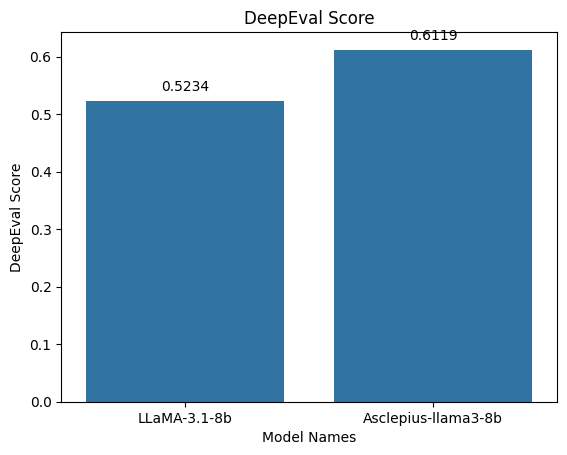

In [ ]:
ax = sns.barplot(x='Category', y='DeepEval Score', data=df0)
plt.title('DeepEval Score')
plt.ylabel('DeepEval Score')
plt.xlabel('Model Names')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

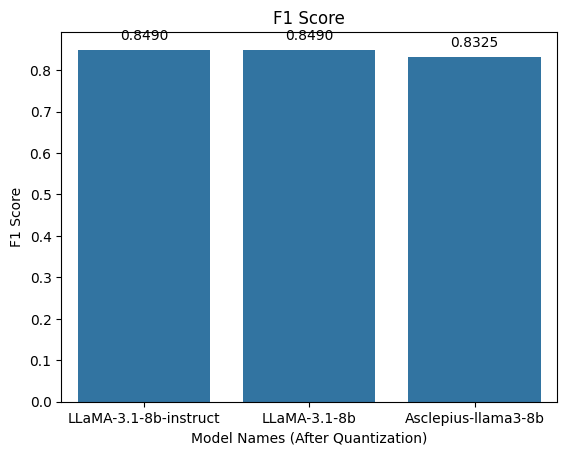

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='Category', y='F1', data=df)
plt.title('F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model Names (After Quantization)')

# Add the numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()